In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfs = pd.read_csv("C:/Users/kimbj/workplace/datas/AI-class-main/titanic.csv", index_col = 0)
df = pd.DataFrame(data=dfs)

In [3]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
X = df.drop(['Name','Ticket','Fare', 'Cabin', 'Embarked'], axis=1)

In [5]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,male,22.0,1,0
2,1,1,female,38.0,1,0
3,1,3,female,26.0,0,0
4,1,1,female,35.0,1,0
5,0,3,male,35.0,0,0
...,...,...,...,...,...,...
887,0,2,male,27.0,0,0
888,1,1,female,19.0,0,0
889,0,3,female,NaN,1,2


In [6]:
X.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [7]:
totall_data=X.dropna(how='any')

In [18]:
totall_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

Text(0.5, 1.0, 'Survived')

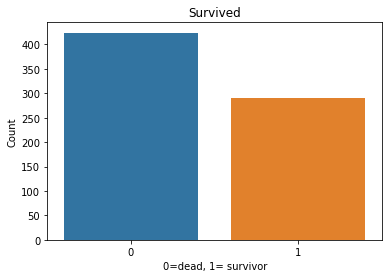

In [19]:
sns.countplot(data=totall_data, x="Survived")
plt.xlabel("0=dead, 1= survivor")
plt.ylabel("Count")
plt.title("Survived")

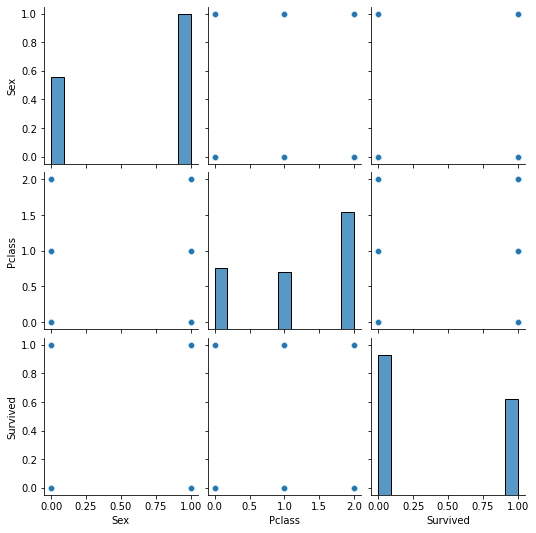

In [20]:
sns.pairplot(totall_data, vars=["Sex","Pclass","Survived"])
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in totall_data.columns:
    totall_data[i]=le.fit_transform(totall_data[i])

C:\Users\kimbj\AppData\Local\Temp/ipykernel_15764/1494105865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totall_data[i]=le.fit_transform(totall_data[i])


In [27]:
X = totall_data.iloc[:,0:5].values
y = totall_data.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [28]:
X

array([[ 0,  2,  1, 28,  1],
       [ 1,  0,  0, 51,  1],
       [ 1,  2,  0, 34,  0],
       ...,
       [ 1,  0,  0, 24,  0],
       [ 1,  0,  1, 34,  0],
       [ 0,  2,  1, 42,  0]], dtype=int64)

In [29]:
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(5,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                60        
                                                                 
 dense_13 (Dense)            (None, 8)                 88        
                                                                 
 dense_14 (Dense)            (None, 6)                 54        
                                                                 
 dense_15 (Dense)            (None, 3)                 21        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\kimbj\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\kimbj\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\kimbj\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\kimbj\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\kimbj\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\kimbj\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\kimbj\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\kimbj\anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\kimbj\anaconda3\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\kimbj\anaconda3\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 7) and (None, 3) are incompatible


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'model_history' is not defined

In [33]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'model_history' is not defined

In [34]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

NameError: name 'y_test_class' is not defined